In [10]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
from random import randint

In [11]:
model = keras.models.load_model('best_image.h5')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)       

In [82]:
def test():
    for i in range(19):
        img_width, img_height = 400, 400
        img = image.load_img('tests/{}.jpg'.format(i), target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        # m = model.predict(img).max()
        m = model.predict(img.reshape(-1,400,400,3)) == model.predict(img.reshape(-1,400,400,3)).max()
        print(np.array(['with_best','no_best'])[m[0]])
        display(Image(filename='tests/{}.jpg'.format(i)))


['no_best']


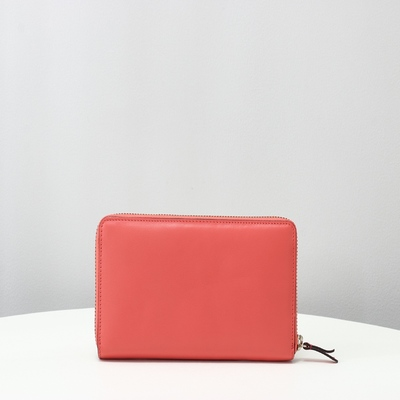

['no_best']


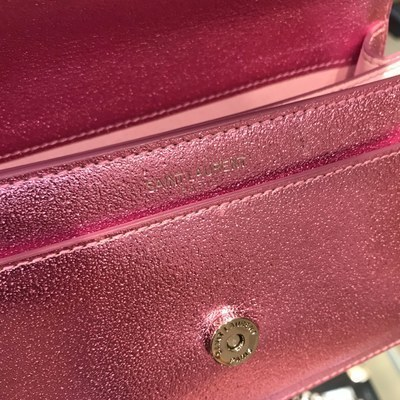

['no_best']


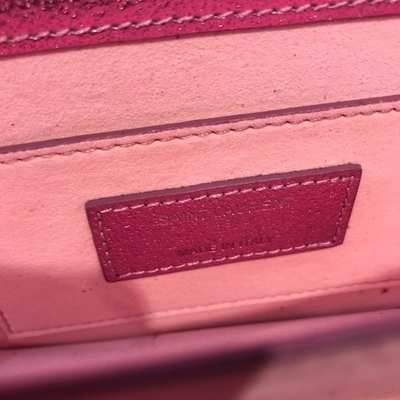

['with_best']


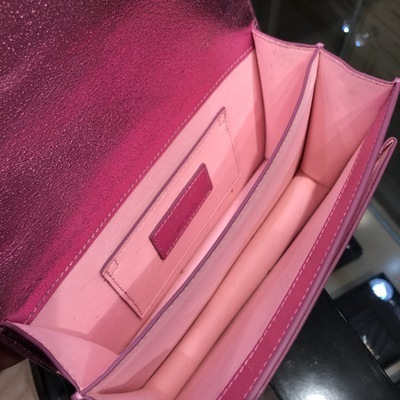

['no_best']


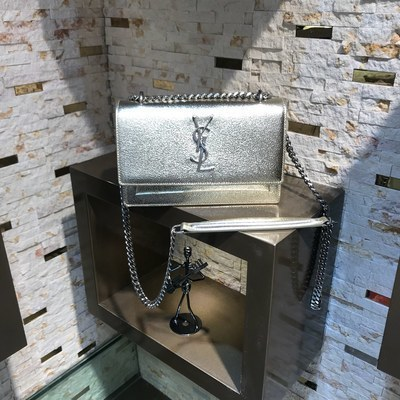

['with_best']


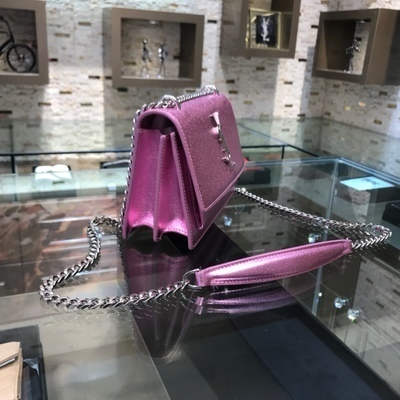

['no_best']


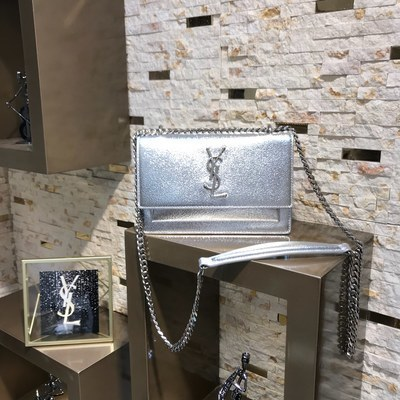

['no_best']


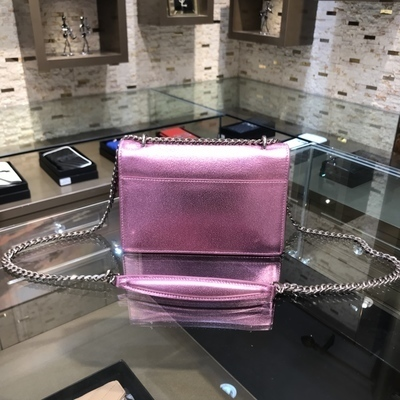

['no_best']


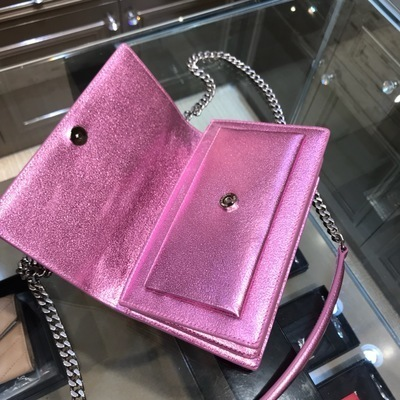

['no_best']


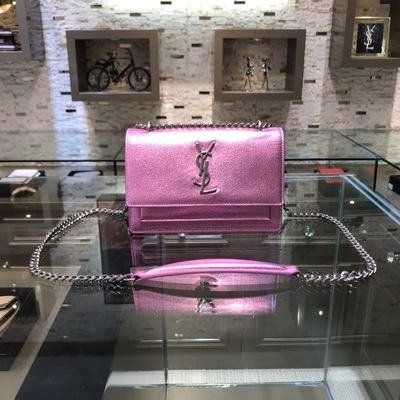

['no_best']


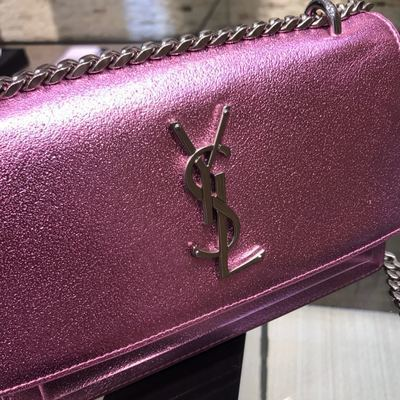

['with_best']


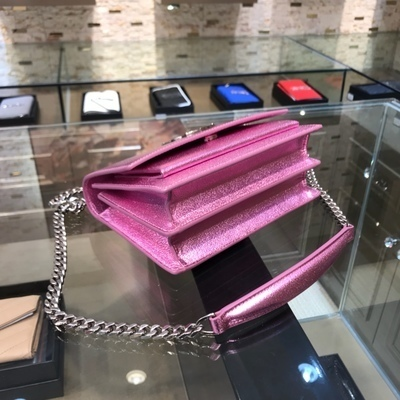

['with_best']


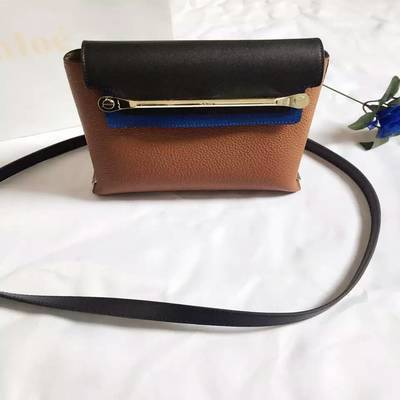

['no_best']


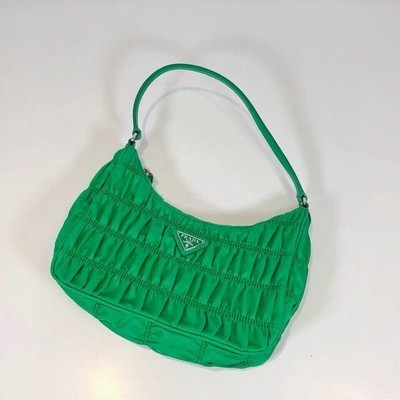

['with_best']


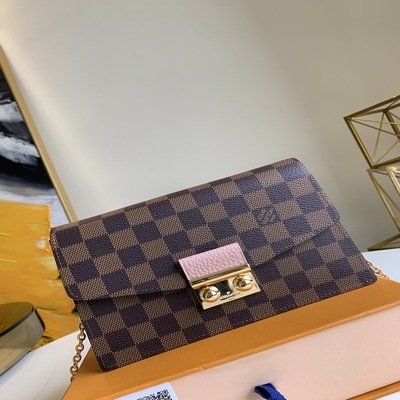

['with_best']


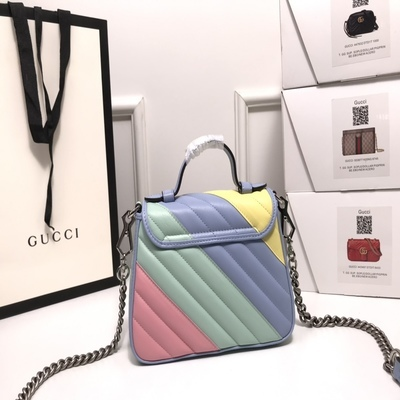

['no_best']


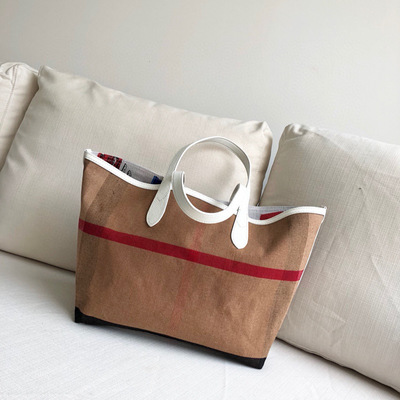

['with_best']


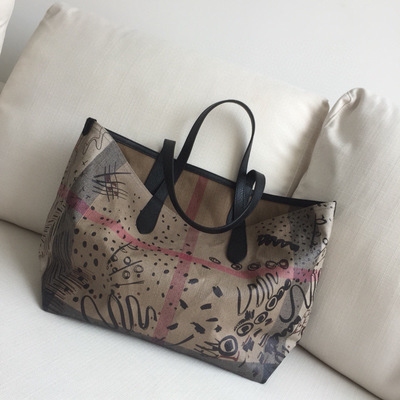

['with_best']


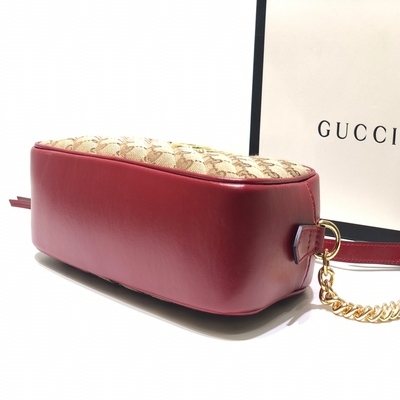

In [83]:
test()

In [ ]:
        print(np.array(['with_best','no_best'])[m[0]])
        data = cv2.imread('tests/{}.jpg'.format(i))
        if m == 'with_best':
            cv2.putText(data, "Good Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)
            plt.figure(figsize = (5,5))
            plt.imshow(data)
            plt.show()
        else:
            cv2.putText(data, "Bad Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)
            plt.figure(figsize = (5,5))
            plt.imshow(data)
            plt.show()  